## Basic K-Means Algorithm Example Code

In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
def generate_random_data_points(n):
    # n data points list with coordinates in format [[x,y],[a,b],[p,q]]
    return [[random.randrange(0,50),random.randrange(0,50)] for i in range(n)]


In [3]:
# Map data points to its nearest Centroid and form clusters
def find_closest_centroid(data_points,centroids):
    data_points_centroid_mapping = []
    for x1,y1 in data_points:
        min_dist=float('Inf')
        index=-1
        for i in range(len(centroids)):
            x2,y2=centroids[i][0],centroids[i][1]
            #Euclidian Distance between two points = square_root( square(x2-x1) + square(y2-y1) )
            dist = pow(( pow((x2-x1),2) + pow((y2-y1),2) ) ,0.5)
            if dist<min_dist:
                min_dist=dist
                index=i
        data_points_centroid_mapping.append(index)

    return data_points_centroid_mapping

In [4]:
# Find Mean Of Clusters and Return New Centroid Points
def mean_of_cluster(data_points,data_points_centroid_mapping,K):
    new_centroids =[]
    for i in range(K):
        X=[]
        Y=[]
        for index in range(len(data_points_centroid_mapping)):
            if data_points_centroid_mapping[index] == i:
                X.append(data_points[index][0])
                Y.append(data_points[index][1])

        new_centroid = [sum(X)/len(X),sum(Y)/len(X)]        
        new_centroids.append(new_centroid)        
    return new_centroids

In [5]:
N=int(input("Enter Number of Data Points (N) : "))
K=int(input("Enter Number of Clusters (K) : "))
I=int(input("Enter Number of Maximum Iterations to Run (I) : "))

Enter Number of Data Points (N) : 30
Enter Number of Clusters (K) : 4
Enter Number of Maximum Iterations to Run (I) : 50


In [6]:
data_points = generate_random_data_points(N)
centroids   = generate_random_data_points(K)
closet_centroids=[None]*N

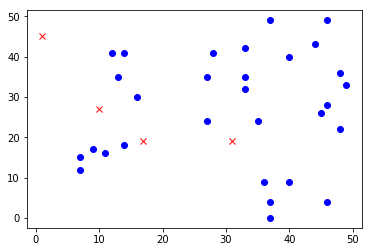

In [7]:
#print(data_points)
#print(centroids)
#print(closet_centroids)

plt.plot([x[0] for x in data_points],[x[1] for x in data_points],'bo')
plt.plot([x[0] for x in centroids],[x[1] for x in centroids],'rx')


In [8]:
while(I>0):
    I-=1
    new_closet_centroids = find_closest_centroid(data_points,centroids)
    if closet_centroids == new_closet_centroids:
        break
    else:
        closet_centroids = new_closet_centroids
        centroids = mean_of_cluster(data_points,closet_centroids,K)

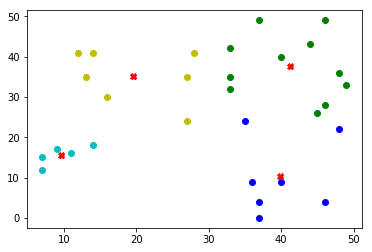

In [9]:
c=['yo','bo','go','co']
for i in range(N):
    plt.plot(data_points[i][0],data_points[i][1],c[closet_centroids[i]])
plt.plot([x[0] for x in centroids],[x[1] for x in centroids],'rX')    